# Masked Normalized Cross-Correlation

In this example, we use the masked normalized cross-correlation to identify the relative shift between two similar images containing invalid data. The images cannot be masked before computing the cross-correlation - masks influence the computation.

In this example, we register the translation between two images. One of the images has about 25% of the pixels which
are corrupted.

.. [1] D. Padfield, "Masked object registration in the Fourier domain"
       IEEE Transactions on Image Processing (2012).
       :DOI:`10.1109/TIP.2011.2181402`


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, draw
from skimage.registration import phase_cross_correlation
from scipy import ndimage as ndi

Define areas of the image which are invalid.
Probability of an invalid pixel is 25%.
This could be due to a faulty detector, or edges that
are not affected by translation (e.g. moving object in a window).
See reference paper for more examples



Known offset (row, col): (-22, 13)
Detected pixel offset (row, col): [-22.  13.]


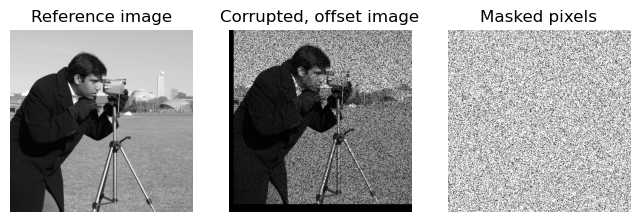

In [2]:
image = data.camera()
shift = (-22, 13)

rng = np.random.default_rng()
corrupted_pixels = rng.choice([False, True], size=image.shape, p=[0.25, 0.75])

# The shift corresponds to the pixel offset relative to the reference image
offset_image = ndi.shift(image, shift)
offset_image *= corrupted_pixels
print(f'Known offset (row, col): {shift}')

# Determine what the mask is based on which pixels are invalid
# In this case, we know what the mask should be since we corrupted
# the pixels ourselves
mask = corrupted_pixels

detected_shift, _, _ = phase_cross_correlation(image, offset_image,
                                         reference_mask=mask)

print(f'Detected pixel offset (row, col): {-detected_shift}')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True,
                                    figsize=(8, 3))

ax1.imshow(image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Corrupted, offset image')

ax3.imshow(mask, cmap='gray')
ax3.set_axis_off()
ax3.set_title('Masked pixels')


plt.show()

Solid masks are another example. In this case, we have a limited view of an image and an offset image. The masks for these images need not be the same. The `phase_cross_correlation` function will correctly identify which part of the images should be compared.

Known offset (row, col): (-22, 13)
Detected pixel offset (row, col): [-22.  13.]


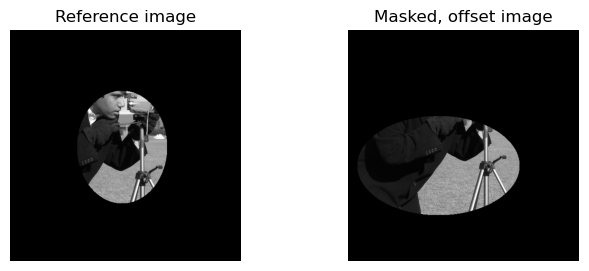

In [3]:
image = data.camera()
shift = (-22, 13)

rr1, cc1 = draw.ellipse(259, 248, r_radius=125, c_radius=100,
                        shape=image.shape)

rr2, cc2 = draw.ellipse(300, 200, r_radius=110, c_radius=180,
                        shape=image.shape)

mask1 = np.zeros_like(image, dtype=bool)
mask2 = np.zeros_like(image, dtype=bool)
mask1[rr1, cc1] = True
mask2[rr2, cc2] = True

offset_image = ndi.shift(image, shift)
image *= mask1
offset_image *= mask2

print(f'Known offset (row, col): {shift}')

detected_shift, _, _ = phase_cross_correlation(image, offset_image,
                                         reference_mask=mask1,
                                         moving_mask=mask2)

print(f'Detected pixel offset (row, col): {-detected_shift}')

fig = plt.figure(figsize=(8,3))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)

ax1.imshow(image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Masked, offset image')

plt.show()